In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import pi, sin,cos, arctan2, sqrt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kmeans2 import KMeansAlgorithm

In [2]:
"""
Load csv into pandas dataframe
"""

flname="../dataset_cluster_warehouse_exp_2.csv"
df = pd.read_csv(flname)
df

,province_name,city_name,district_name,subdistrict_name,lat_long,avg_demand_baseline,demand_target
0,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,"-6.13727,106.7153587",57,85.5
1,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,"-6.1385859,106.7293052",33,49.5
2,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,"-6.1715044,106.7056503",25,37.5
3,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,"-6.1613339,106.7294525",40,60.0
4,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,"-6.159495,106.7897422",153,229.5
...,...,...,...,...,...,...,...
185,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,"-6.1852948,106.8073138",45,67.5
186,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,"-6.2076699,106.8075363",240,360.0
187,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,"-6.1906249,106.8072637",99,148.5
188,DKI JAKARTA,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,"-6.1968299,106.8074788",37,55.5


In [3]:
"""
split data lat_long into each lat and long it self.
"""

data_lat = []
data_long = []
for idx, row in df.iterrows():
    point = row['lat_long'].split(',')
    lat = float(point[0])
    long = float(point[1])
    data_lat.append(lat)
    data_long.append(long)

df = df.assign(lat=data_lat, long=data_long)
dataset = df[['city_name', 'district_name','subdistrict_name', 'avg_demand_baseline', 'demand_target', 'lat', 'long']]
dataset

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359
1,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG TIMUR,33,49.5,-6.138586,106.729305
2,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,DURI KOSAMBI,25,37.5,-6.171504,106.705650
3,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,RAWA BUAYA,40,60.0,-6.161334,106.729452
4,KOTA ADMINISTRASI JAKARTA BARAT,GROGOL PETAMBURAN,GROGOL,153,229.5,-6.159495,106.789742
...,...,...,...,...,...,...,...
185,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KAMPUNG BALI,45,67.5,-6.185295,106.807314
186,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KARET TENGSIN,240,360.0,-6.207670,106.807536
187,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON KACANG,99,148.5,-6.190625,106.807264
188,KOTA ADMINISTRASI JAKARTA PUSAT,TANAH ABANG,KEBON MELATI,37,55.5,-6.196830,106.807479


/home/hafidabi/PycharmProjects/clustering-gudang/venv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hafidabi/PycharmProjects/clustering-gudang/venv/lib/python3.8/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


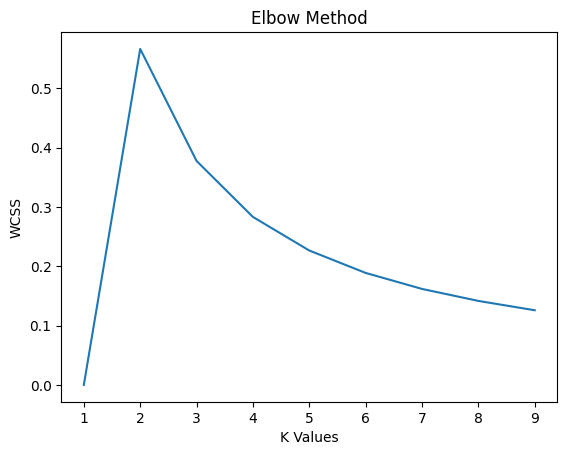

In [4]:
"""
Elbow method to determine number of cluster
"""
train_dataset = dataset[['lat', 'long']]
crange = 10
kmeans = KMeansAlgorithm(train_dataset, crange)
kmeans.fit_model(300)
kmeans.plot_elbow()

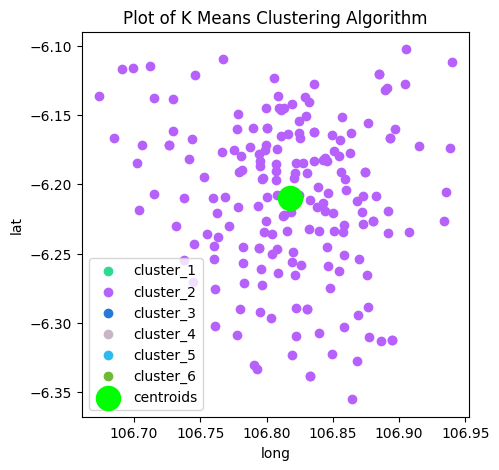

In [5]:
"""
K means clustering
"""
km = KMeansAlgorithm(train_dataset, 6)
km.fit_model(200)
km.plot_kmeans()

In [6]:
"""
Centroid and parsing format of centroid into more readable format
"""

centroid = []
for i in range(len(km.centroids[0])):
    centroid.append([km.centroids[0][i], km.centroids[1][i]])
centroid

[[nan, nan],
 [-6.210057266842107, 106.81757062842107],
 [nan, nan],
 [nan, nan],
 [nan, nan],
 [nan, nan]]

In [7]:
"""
show dataset again with its class predicition
"""

y_km = km.predict()
#assign y pred to dataset
pred_result = [0 for i in range(dataset.shape[0])]
for prediction in y_km[0].keys():
    for d in y_km[0][prediction]:
        idx = dataset[(dataset["lat"]==d[0]) & (dataset["long"]==d[1])].index.tolist()
        for id in idx:
            pred_result[id] = prediction
dataset = dataset.assign(pred=pred_result)
dataset.sort_values("pred")

,city_name,district_name,subdistrict_name,avg_demand_baseline,demand_target,lat,long,pred
0,KOTA ADMINISTRASI JAKARTA BARAT,CENGKARENG,CENGKARENG BARAT,57,85.5,-6.137270,106.715359,2
121,KOTA ADMINISTRASI JAKARTA TIMUR,MAKASSAR,KEBON PALA,17,30.6,-6.253650,106.869494,2
122,KOTA ADMINISTRASI JAKARTA TIMUR,MAKASSAR,PINANG RANTI,57,102.6,-6.288705,106.876589,2
123,KOTA ADMINISTRASI JAKARTA TIMUR,MATRAMAN,KEBON MANGGIS,44,79.2,-6.206336,106.846100,2
124,KOTA ADMINISTRASI JAKARTA TIMUR,MATRAMAN,PISANGAN BARU,91,163.8,-6.212030,106.868240,2
...,...,...,...,...,...,...,...,...
66,KOTA ADMINISTRASI JAKARTA SELATAN,MAMPANG PRAPATAN,TEGAL PARANG,44,66.0,-6.249072,106.820218,2
67,KOTA ADMINISTRASI JAKARTA SELATAN,PANCORAN,PANCORAN,45,67.5,-6.245223,106.845821,2
68,KOTA ADMINISTRASI JAKARTA SELATAN,PANCORAN,DUREN TIGA,132,198.0,-6.256225,106.819059,2
59,KOTA ADMINISTRASI JAKARTA SELATAN,KEBAYORAN LAMA,KEBAYORAN LAMA SELATAN,232,348.0,-6.253985,106.759986,2


In [8]:
#Count for silhoutte score
#Silhoutte Score


s_score = silhouette_score(train_dataset, km.labels_, metric='euclidean')
print("sihoute score is ", s_score)

AttributeError: 'KMeansAlgorithm' object has no attribute 'labels_'